In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, BatchNormalization, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# Preprocessing


In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=30,
    width_shift_range=0.10,
    height_shift_range=0.10,
)
batch_sizee = 32
img_width = 64
img_height = 64


In [3]:
train_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),
    batch_size=batch_sizee,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
    )
validasi_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),    
    batch_size=batch_sizee,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'
)

Found 14234 images belonging to 2 classes.
Found 2511 images belonging to 2 classes.


## Modeling


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Ubah ke softmax jika 2 kelas
])


optimizer = Adam(learning_rate=0.001)
loss_function = 'binary_crossentropy' 
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])



model.summary()

c:\Program Files\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 32, 32, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,585 (4.06 MB)

 Trainable params: 1,065,393 (4.06 MB)

 Non-trainable params: 192 (768.00 B)

# Training


In [5]:
history = model.fit(
    train_data,
    validation_data=validasi_data,
    epochs=10
)


c:\Program Files\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 118s 255ms/step - accuracy: 0.9158 - loss: 0.2214 - val_accuracy: 0.7802 - val_loss: 1.1332
Epoch 2/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 107s 241ms/step - accuracy: 0.9753 - loss: 0.0779 - val_accuracy: 0.9446 - val_loss: 0.1558
Epoch 3/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 104s 233ms/step - accuracy: 0.9873 - loss: 0.0386 - val_accuracy: 0.9665 - val_loss: 0.1121
Epoch 4/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 105s 236ms/step - accuracy: 0.9879 - loss: 0.0365 - val_accuracy: 0.9825 - val_loss: 0.0533
Epoch 5/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 114s 256ms/step - accuracy: 0.9910 - loss: 0.0269 - val_accuracy: 0.8009 - val_loss: 0.9106
Epoch 6/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 105s 237ms/step - accuracy: 0.9905 - loss: 0.0296 - val_accuracy: 0.9877 - val_loss: 0.0379
Epoch 7/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 99s 222ms/step - accuracy: 0.9937 - loss: 0.0185 - val_accuracy: 0.9904 - val_loss: 0.0313
Epoch 8/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 95s 213ms/step - accuracy: 0.9928 - l

In [6]:
#simpan model dengan nama cnn11
model.save(r"A:\Kuliah\Skrpsi\Program\model_cnn444.h5")



In [7]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  
    img = np.expand_dims(img, axis=0)  
    return img

class_names = validasi_data.class_indices 
class_names = {v: k for k, v in class_names.items()}  

y_true = []
y_pred = []

for image_path, label in zip(validasi_data.filepaths, validasi_data.labels):
    image = preprocess_image(image_path) 
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        continue
    
    prediction = model.predict(image, verbose=0)  
    predicted_class = 1 if prediction[0][0] > 0.5 else 0  
    
    y_true.append(label)  
    y_pred.append(predicted_class)  

cm = confusion_matrix(np.array(y_true), np.array(y_pred))
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(np.array(y_true), np.array(y_pred))


Confusion Matrix:
 [[1384   20]
 [  27 1080]]


In [8]:
print(classification_report(y_true, y_pred, target_names=["AI FIX", "Human"]))


              precision    recall  f1-score   support

      AI FIX       0.98      0.99      0.98      1404
       Human       0.98      0.98      0.98      1107

    accuracy                           0.98      2511
   macro avg       0.98      0.98      0.98      2511
weighted avg       0.98      0.98      0.98      2511



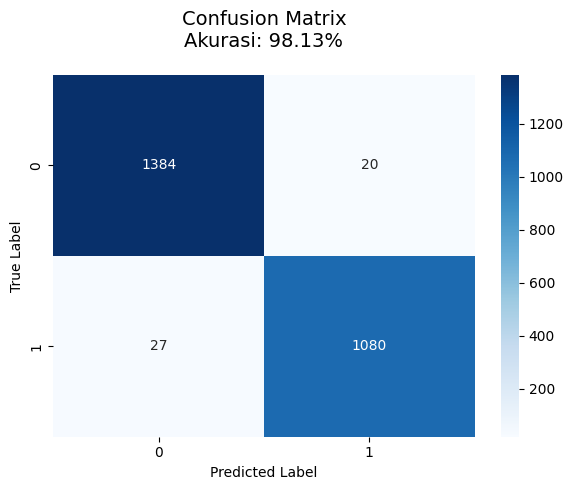

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                 xticklabels=class_names.keys(), 
                 yticklabels=class_names.keys())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Judul dengan akurasi digabung
plt.title(f"Confusion Matrix\nAkurasi: {accuracy:.2%}", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


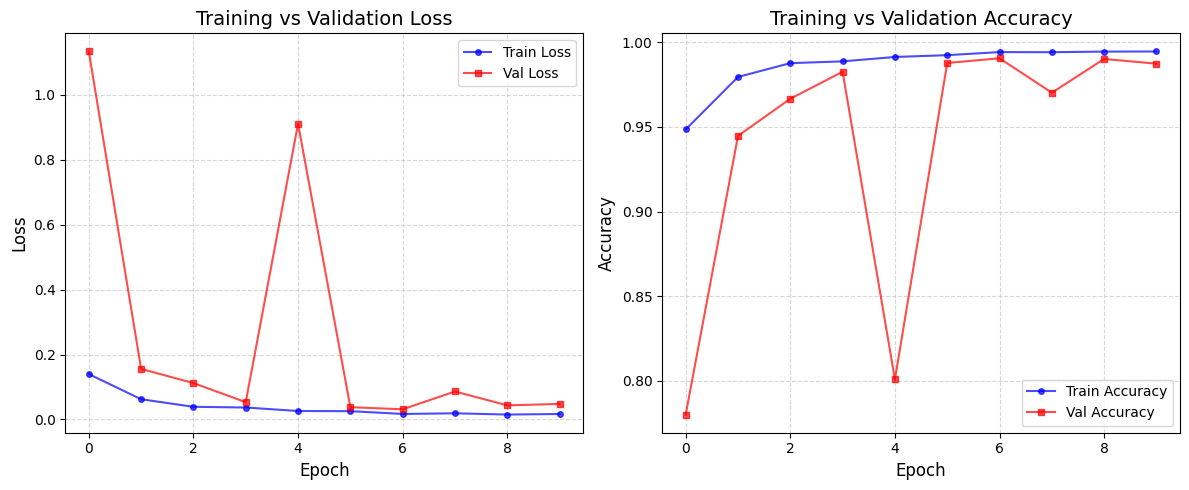

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Lebar 12 inci, tinggi 5 inci

# === Subplot 1: Loss ===
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_loss'], label='Val Loss', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# === Subplot 2: Accuracy ===
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Mencegah tumpang tindih
plt.show()